# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 不顯示科學記號
pd.set_option('display.float_format',lambda x : '%.5f' % x)

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,...,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00000,513000.00000,21865.50000,...,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
app_train.dtypes.head(10)

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
dtype: object

In [4]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [np.dtype('float64'), np.dtype('int64')]

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])

print("Numbers of remain columns:", len(numeric_columns))

Numbers of remain columns: 73


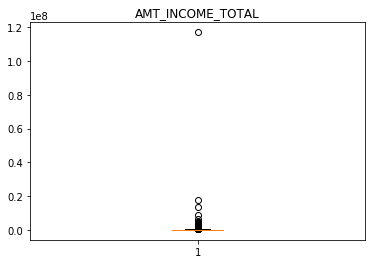

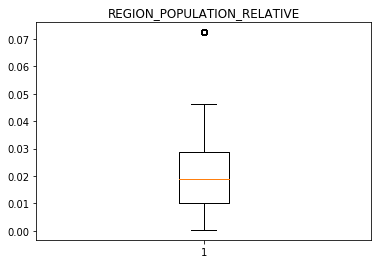

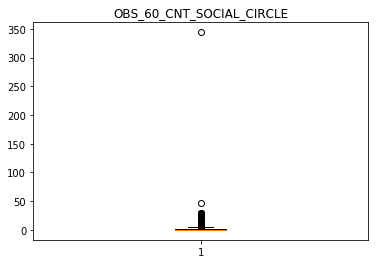

In [6]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

# 檢視這些欄位的數值範圍

numeric_columns_2 = ['AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE','OBS_60_CNT_SOCIAL_CIRCLE']

for col in numeric_columns_2:
    """
    Your CODE HERE, make the box plot
    """
    plt.boxplot(app_train[col].dropna())    
    plt.title(col)
    plt.show()

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [7]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64


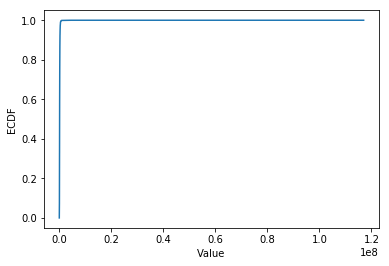

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


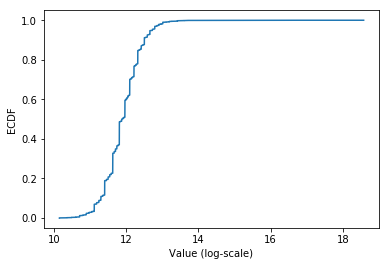

In [8]:
# 最大值離平均與中位數很遠
import statsmodels as sm
from statsmodels import distributions


# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = sm.distributions.ECDF(np.array(app_train['AMT_INCOME_TOTAL']))

plt.plot(cdf.x, cdf.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
#plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(cdf.x), cdf.y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [9]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

count   307511.00000
mean         0.02087
std          0.01383
min          0.00029
25%          0.01001
50%          0.01885
75%          0.02866
max          0.07251
Name: REGION_POPULATION_RELATIVE, dtype: float64


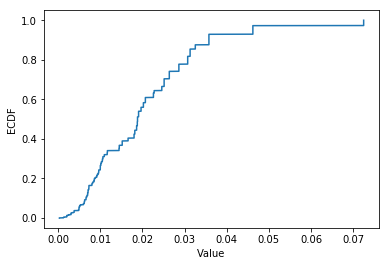

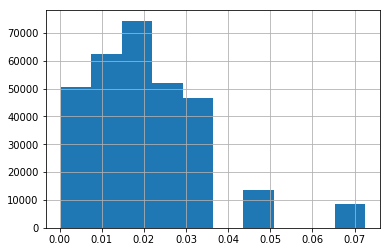

0.03579    16408
0.04622    13442
0.03076    12163
0.02516    11950
0.02639    11601
0.03133    11321
0.02866    11157
0.01910     8694
0.07251     8412
0.02071     8066
0.01885     7668
0.02025     7178
0.01863     7038
0.02262     6943
0.01522     6824
0.03256     6636
0.02461     6404
0.01969     6172
0.01803     6167
0.01880     6108
0.01821     6052
0.01452     4785
0.01661     4408
0.00702     4105
0.02280     3807
0.01003     3570
0.01001     3563
0.01446     3422
0.00496     3300
0.01170     3252
           ...  
0.00601     1796
0.00307     1783
0.00857     1763
0.00847     1740
0.00727     1724
0.00711     1684
0.00630     1672
0.00807     1668
0.00887     1654
0.00667     1653
0.00204     1642
0.00381     1616
0.00508     1482
0.00630     1225
0.00531     1218
0.00382     1212
0.00312     1147
0.00623     1087
0.00500     1068
0.00213     1051
0.00485     1038
0.00514      967
0.00251      944
0.00354      627
0.00128      558
0.00142      467
0.00133      235
0.00053       

In [10]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = sm.distributions.ECDF(np.array(app_train['REGION_POPULATION_RELATIVE']))


plt.plot(cdf.x, cdf.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [11]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

count   306490.00000
mean         1.40529
std          2.37980
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max        344.00000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


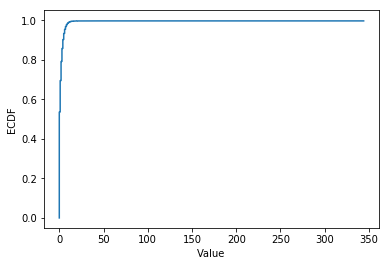

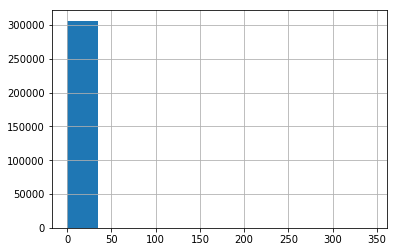

344.00000         1
47.00000          1
30.00000          1
29.00000          2
28.00000          1
27.00000          5
26.00000          1
25.00000         11
24.00000         12
23.00000         13
22.00000         20
21.00000         28
20.00000         30
19.00000         44
18.00000         49
17.00000         73
16.00000        137
15.00000        166
14.00000        238
13.00000        401
12.00000        620
11.00000        837
10.00000       1335
9.00000        1959
8.00000        2886
7.00000        4344
6.00000        6349
5.00000        9463
4.00000       13946
3.00000       20215
2.00000       29766
1.00000       48870
0.00000      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [12]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = sm.distributions.ECDF(np.array(app_train['OBS_60_CNT_SOCIAL_CIRCLE']))


plt.plot(cdf.x, cdf.y)
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

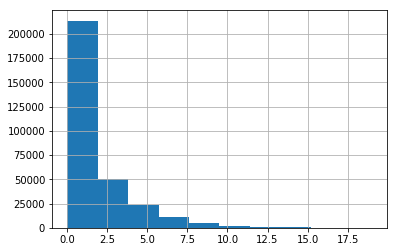

In [13]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""

data = app_train[app_train['OBS_60_CNT_SOCIAL_CIRCLE']<20]['OBS_60_CNT_SOCIAL_CIRCLE']
data.hist()
